In [67]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

In [68]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot: ylabel='Frequency'>

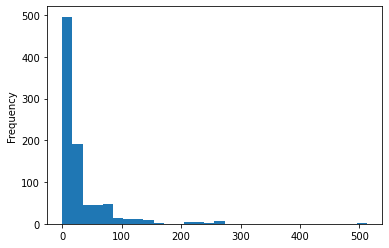

In [69]:
train_data.Fare.plot(kind = "hist",bins = 30)

<AxesSubplot: >

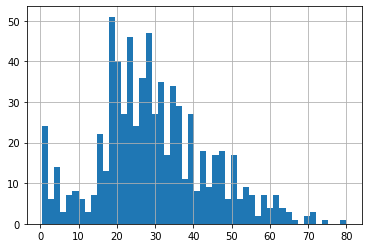

In [70]:
train_data.Age.hist(bins = 50)

<AxesSubplot: >

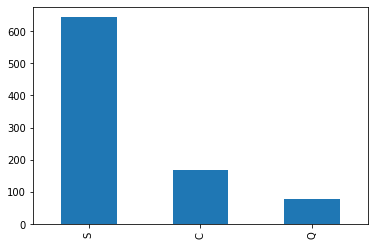

In [71]:
train_data.Embarked.value_counts().plot(kind = "bar")

In [72]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [73]:
output_data = train_data["Survived"] #891
input_data = train_data.drop(columns = ["Name","Ticket", "Cabin","PassengerId"], axis = 1 ) #891

In [74]:
input_data.dropna(how="any",axis = 0, inplace = True) # 712
output_data = input_data["Survived"] #712

In [75]:
dummy = pd.get_dummies(input_data["Sex"])
input_data = pd.concat((input_data,dummy), axis = 1)

In [76]:
embarked = input_data['Embarked'].replace("S",1).replace("Q",2).replace("C",3);

In [77]:
input_data.drop(columns=["female","Sex","Embarked","Survived"],axis = 1, inplace = True)

In [78]:
input_data2 = pd.concat((input_data,embarked), axis = 1)

In [79]:
input_data2_train, input_data2_test,output_data_train, output_data_test = train_test_split(input_data2,output_data,test_size=0.2)

In [80]:
model = DecisionTreeClassifier()
model.fit(input_data2_train,output_data_train)
predictions = model.predict(input_data2_test)

In [81]:
print(f" The accuracy of the model is found to be : {accuracy_score(output_data_test,predictions)}")

 The accuracy of the model is found to be : 0.7272727272727273


In [82]:
# out_visual = output_data.replace(0, 'Died').replace(1, 'Survived');
# tree.export_graphviz(model,out_file="Titanic_visual.dot",
#                      feature_names = ["Pclass", "Age","SibSp","Parch","Fare","male","Embarked"],
#                      class_names = sorted(out_visual.unique()),
#                       label = "all",
#                       rounded = True,
#                       filled = True)

Implementing NN

In [83]:
## Neural Network
import tensorflow as tf
from sklearn.model_selection import train_test_split
from random import random

In [160]:
x_train,x_test,y_train,y_test = train_test_split(input_data2,output_data,test_size=0.2)
x_array = np.asarray(x_train)
y_array = np.asarray(y_train)
y_array_test =  np.asarray(y_test)
x_array_test = np.asarray(x_test)

model2 = tf.keras.Sequential([
        tf.keras.layers.Dense(16,input_dim = 7,activation = "relu"),
        tf.keras.layers.Dense(16,activation = "relu"),
        tf.keras.layers.Dense(1,activation = "sigmoid")
    ])
    #compile model
#optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1)
model2.compile(optimizer = "adam",loss ="binary_crossentropy",metrics = ["accuracy"])

    #train model
model2.fit(x_array,y_array,epochs = 150,batch_size = 32)


Epoch 1/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6828 - accuracy: 0.6977
Epoch 2/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6280 - accuracy: 0.7065
Epoch 3/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6148 - accuracy: 0.7030
Epoch 4/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.7030
Epoch 5/150
18/18 [==============================] - 0s 1ms/step - loss: 0.6226 - accuracy: 0.7047
Epoch 6/150
18/18 [==============================] - 0s 1ms/step - loss: 0.5898 - accuracy: 0.7170
Epoch 7/150
18/18 [==============================] - 0s 1ms/step - loss: 0.5858 - accuracy: 0.7118
Epoch 8/150
18/18 [==============================] - 0s 1ms/step - loss: 0.5857 - accuracy: 0.7258
Epoch 9/150
18/18 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.7153
Epoch 10/150
18/18 [==============================] - 0s 1ms/step - loss: 0.5828 - accuracy: 0.7153
Epoch 11/

In [165]:
#evaluate model
print(f"model evaluation {model2.evaluate(x_array_test,y_array_test,verbose = 1)}")
#make predictions
print(f" The accuracy of NN model is found to be : {accuracy_score(y_array_test,model.predict(x_array_test))}")

5/5 [==============================] - 0s 1ms/step - loss: 0.4995 - accuracy: 0.7483
model evaluation [0.49946871399879456, 0.748251736164093]
 The accuracy of NN model is found to be : 0.965034965034965


C:\Users\amoha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
